Подключим библиотеки:

In [9]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split

Работа с набором данных:

In [19]:
PATH = "creditcard_2023_reduced.csv"
COLUMNS_TO_DROP = ['id'] + [f"V{i}" for i in range(1, 19)]
dataset = pd.read_csv(PATH).drop(COLUMNS_TO_DROP, axis=1)
dataset

,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.562313,-0.185879,-0.061250,0.361038,-0.430878,-0.878826,0.210841,1.136256,-0.154596,0.270943,8579.91,0
1,-0.501961,0.032210,0.091238,-0.105949,-0.330057,-0.175801,0.471390,-0.893842,0.465541,0.565141,12590.99,1
2,1.471346,0.922465,0.443220,0.669923,-0.197212,-0.012823,0.081098,0.817660,1.599319,1.266671,3677.58,1
3,0.740389,1.376059,0.553915,-1.291042,-0.856756,0.282960,2.358688,-0.520301,2.034281,1.027087,5417.72,1
4,2.282425,-0.186934,-0.037363,-0.328521,-2.106835,0.275630,-0.681096,0.450903,1.756981,-1.166124,12294.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...
56858,-1.456377,-0.578866,-0.108430,0.173373,0.058525,-1.596375,0.168986,1.158538,-0.190227,-0.116364,7470.55,0
56859,-0.567702,-0.374697,-0.125315,-0.319531,-0.004860,-0.068343,-0.944108,-2.308246,-0.206627,0.282885,805.81,0
56860,1.530381,0.117591,0.045588,-0.019686,0.221484,0.610227,-1.086038,-0.456506,0.132464,-0.198390,16016.76,1
56861,0.110963,-0.277087,-0.157337,-0.330994,0.113650,-0.158721,-0.227888,-0.191335,-0.285649,-0.208421,12496.85,0


Проверим признаки на значимость и корреляцию:

<Axes: >

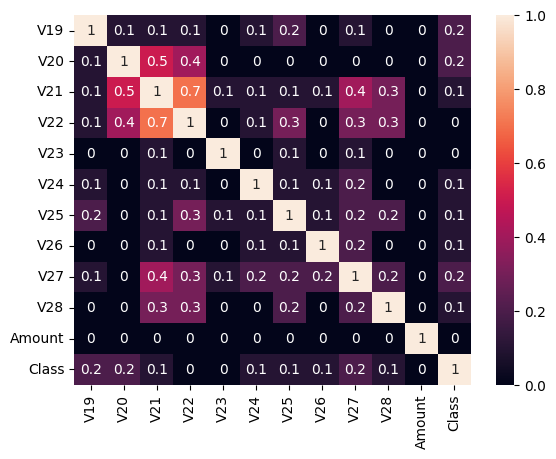

In [20]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1
    ),
    annot=True
)

Разделим данные на тестовые и тренировочные:

In [22]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop(['Class'], axis=1),
    dataset['Class'],
    test_size=0.2
)

Построим модель дерева решений, а также выведем матрицу сходства предсказанных значений тестового набора и эталонных значений:

Text(0.5, 1.0, 'Матрица сходства')

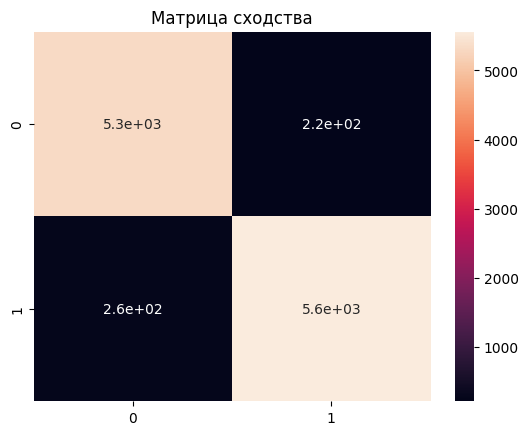

In [23]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)

sns.heatmap(confusion_matrix, annot=True)
plt.title("Матрица сходства")

Получим само дерево решений:

Text(0.5, 1.0, 'Дерево решений')

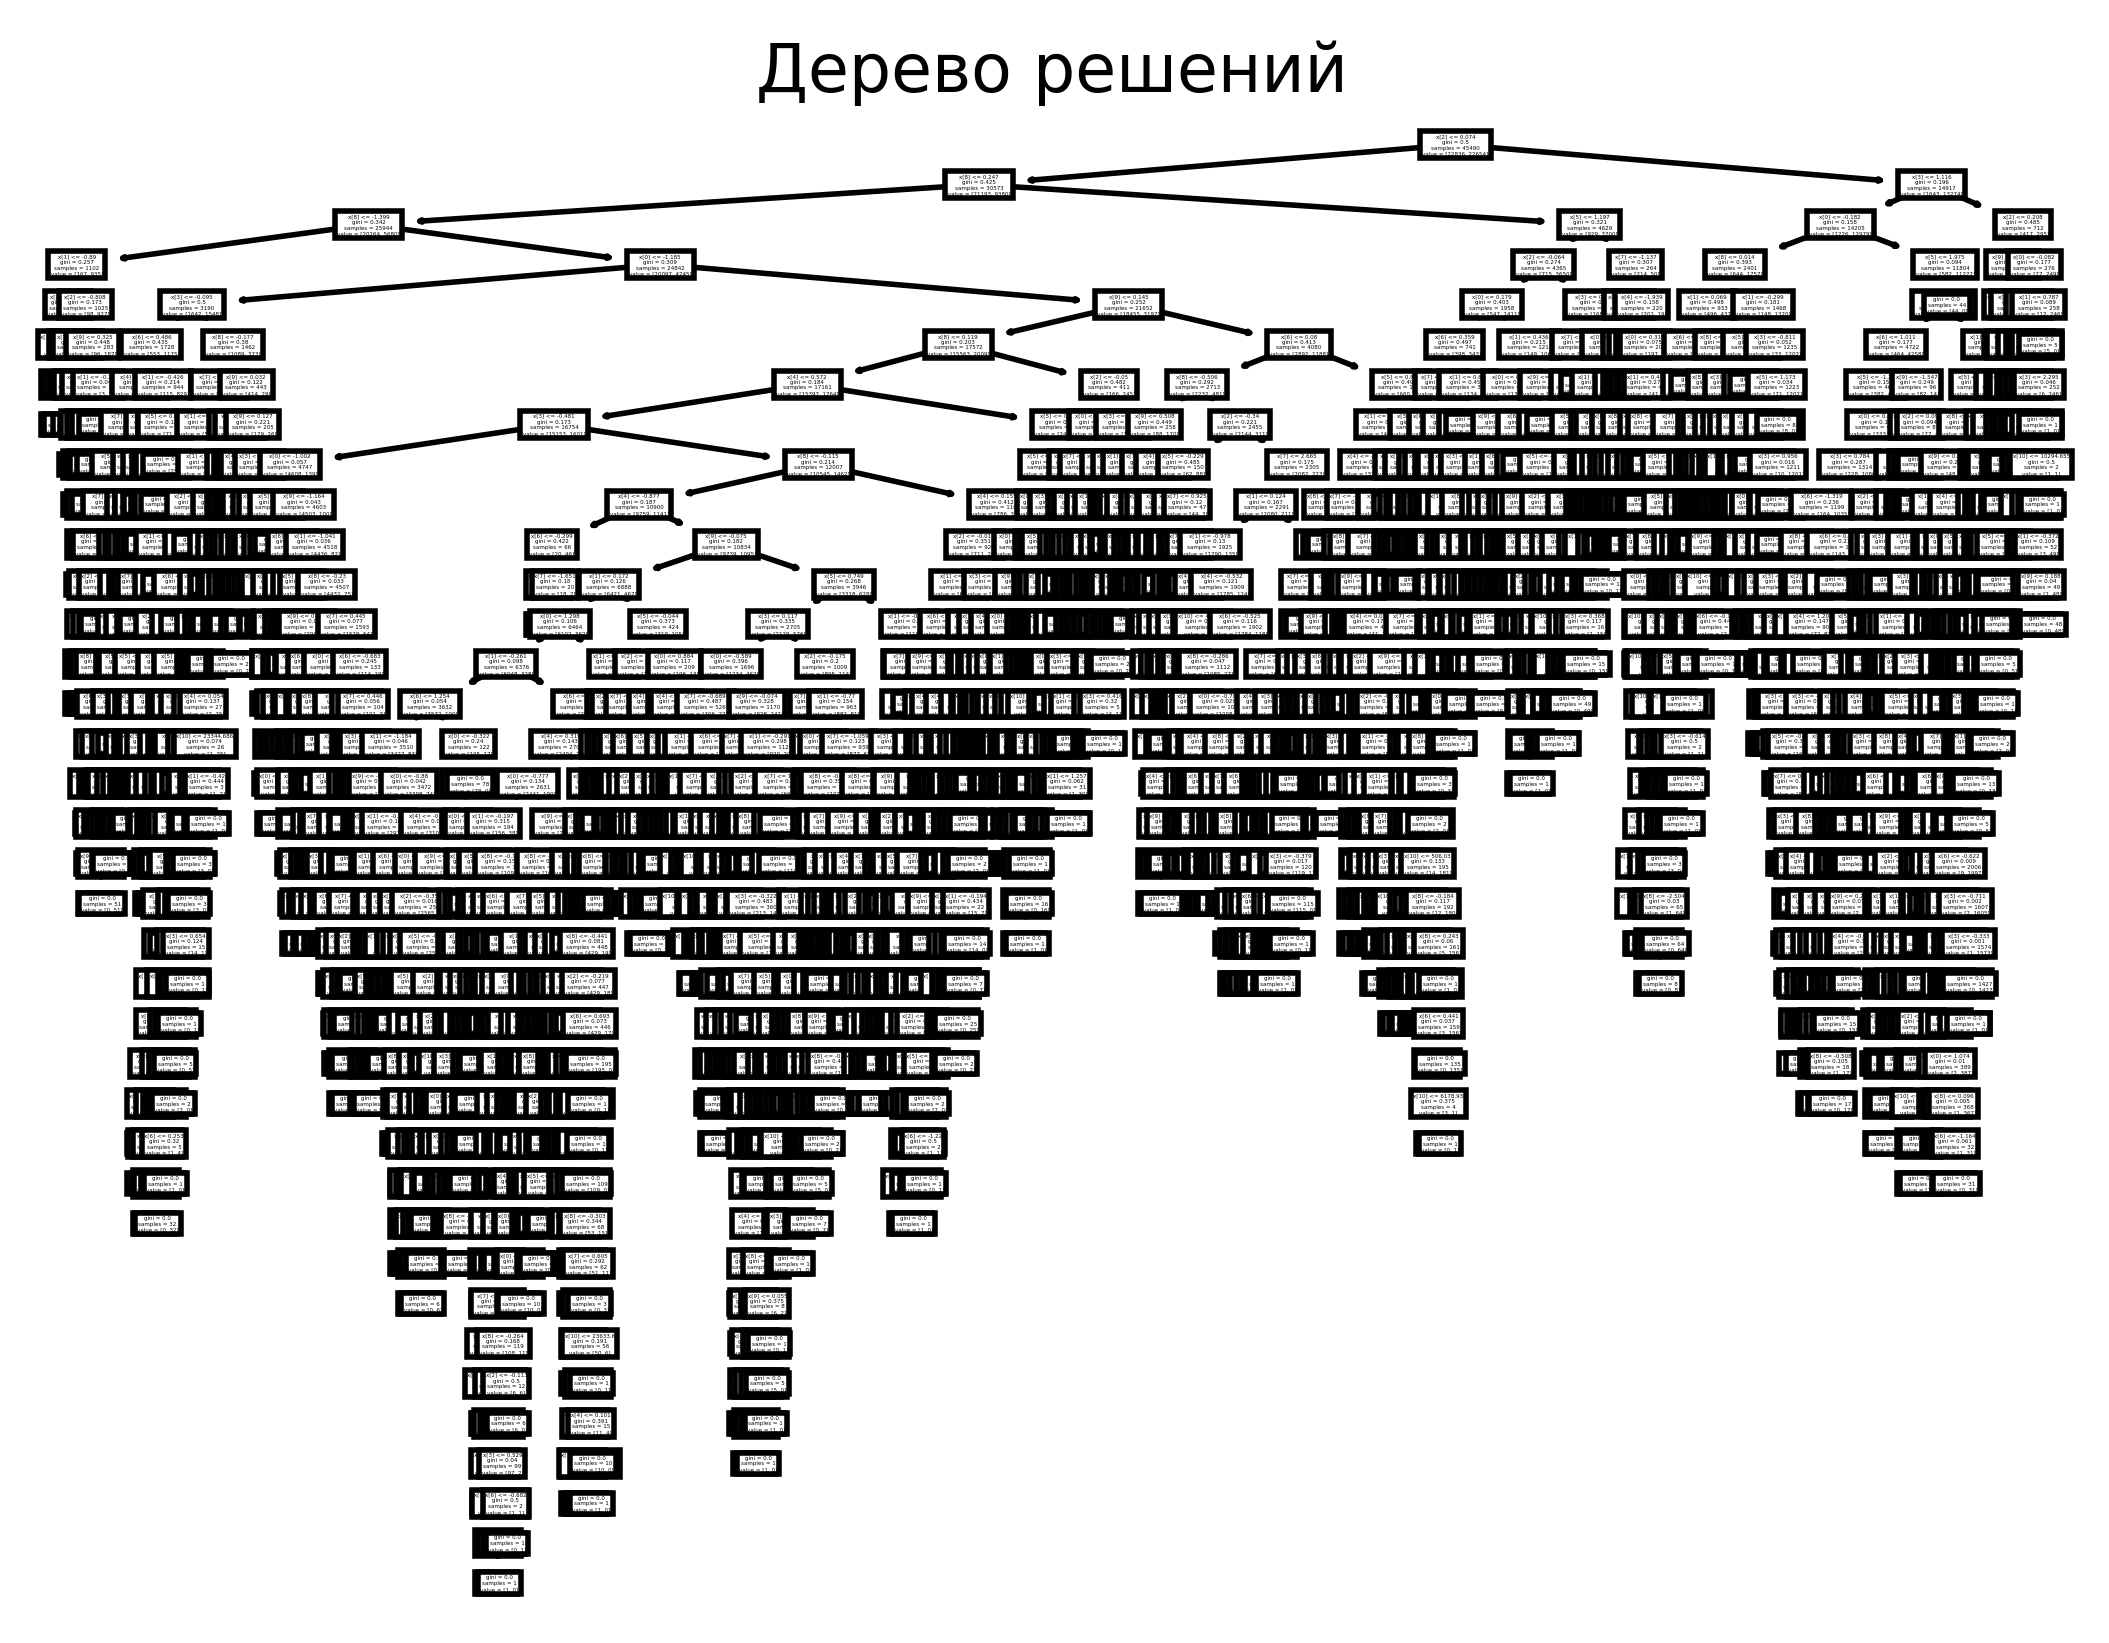

In [25]:
DPI = 400
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")